In [1]:
from trajdiff.stlcg import *

/Users/vikram/research/trajectory-diffusion/env/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [6]:
x = np.arange(-2,2,0.1)
y = np.zeros_like(x)
y[:10] = -0.5
y[10:30] = 0.5
y[30:] = -0.5
y += np.random.randn(len(x)) * 0.1

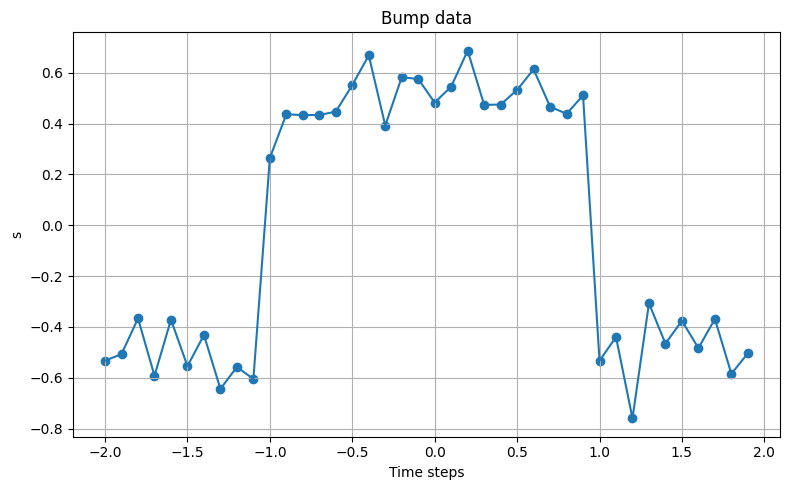

In [8]:
plt.figure(figsize=(8,5))
plt.plot(x,y)
plt.scatter(x,y)
plt.grid()
plt.xlabel("Time steps")
plt.ylabel("s")
plt.title("Bump data")
plt.tight_layout()

In [9]:
class NN(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NN, self).__init__()
        self.fc1 = torch.nn.Linear(input_size, hidden_size)
        self.fc2 = torch.nn.Linear(hidden_size, output_size)
        self.relu = torch.nn.ReLU()
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [10]:
model = NN(1, 10, 1)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=0.01)

stl_model = NN(1, 10, 1)
stl_optimizer = torch.optim.Adam(stl_model.parameters(), lr=0.01, weight_decay=0.01)

In [15]:
# Data

x_t = torch.tensor(x).reshape(-1,1) # [B, 1]
y_t = torch.tensor(y).reshape(-1,1) # [B, 1]

y_upper_lim = torch.tensor(0.52)
y_lower_lim = torch.tensor(0.48)

In [21]:
# STL Formula

y_exp = Expression("y", y_t)

sub1 = y_exp <= y_upper_lim * torch.ones_like(y_t)
sub2 = y_exp >= y_lower_lim * torch.ones_like(y_t)

formula = Always(subformula=And(sub1, sub2))
print(formula)



◻ [0, inf]( (y <= input) ∧ (y >= input) )


In [25]:


print(formula.robustness((y_t[None, :], y_t[None, :])))

tensor([[[-1.2398]]], dtype=torch.float64)


In [ ]:
# Train NN

for _ in range(1000):
    optimizer.zero_grad()
    y_pred = model(x_t)
    loss = torch.mean((y_pred - y_t)**2)
    loss.backward()
    optimizer.step()

